# Regression

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('kc_house_data.csv')

#### EDA

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6614,2071700010,20141119T000000,340000.0,3,2.25,2580,7434,1.0,0,0,...,7,1630,950,1963,0,98133,47.7446,-122.332,1920,7737
9240,2402100205,20141119T000000,412133.0,2,1.00,920,4400,1.0,0,0,...,7,920,0,1948,0,98103,47.6903,-122.332,1560,4600
144,6071600370,20150227T000000,500000.0,4,2.25,2030,8517,1.0,0,0,...,8,1380,650,1961,0,98006,47.5495,-122.174,2230,8824
12708,9286100150,20140811T000000,475200.0,3,2.50,1670,3980,2.0,0,0,...,8,1670,0,2000,0,98027,47.5317,-122.047,1670,2897
16177,2791500020,20140604T000000,250500.0,3,2.00,1710,7225,2.0,0,0,...,7,1710,0,1988,0,98023,47.2917,-122.373,1710,7225


In [7]:
df.shape

(21613, 21)

In [8]:
df.info()
#returns the names and datatypes of all columns and the number of filled records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
#just type df to see the whole table
#but it puts three dots in between it doesn't show them all so you need to write something more above
# to see all
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
df.corr()
#Pearson Colleration matrix
#shows which columns are connected and how much (in %) for example, as the mileage increases, the price decreases, so there is a relationship, that is, an inverse relationship.
#we can't see the brand because we will use another method in writing
# You cannot use corr values below 20% and above 90%
#For example, age and date of birth are proportional to +99.9999
#Cruise cruise control

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [11]:
abs(df.corr()['price']).sort_values(ascending=False)
# Thanks to ascending=False, it sorts in reverse order b->k
# Find the corr of all other rows according to #price and convert to absolute value and sort
# sort_values(ascending=False) b->k sort
# We will take values above 20%

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

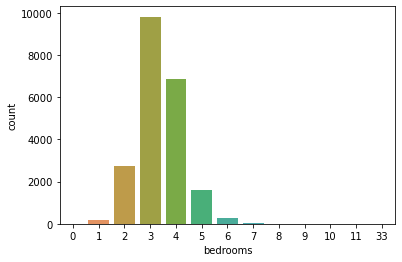

In [12]:
sns.countplot(df['bedrooms']);

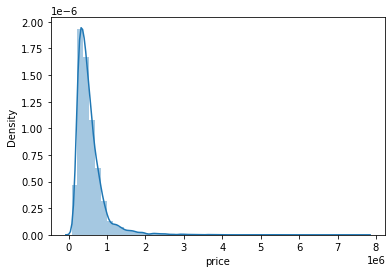

In [13]:
sns.distplot(df['price'].sort_values());

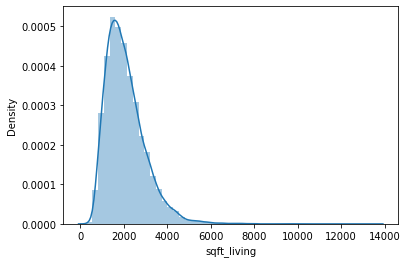

In [14]:
sns.distplot(df['sqft_living']);

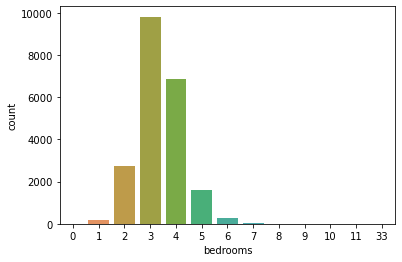

In [15]:
sns.countplot(df['bedrooms']);

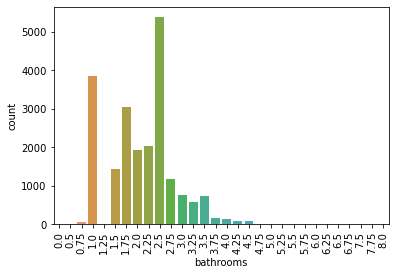

In [16]:
sns.countplot(df['bathrooms'])
plt.xticks(rotation=90);

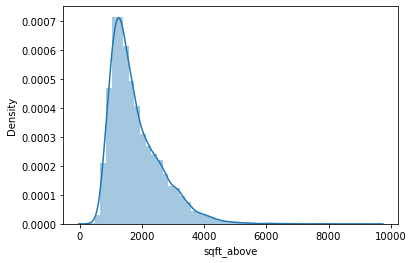

In [17]:
sns.distplot(df['sqft_above']);

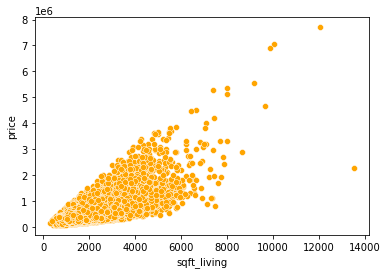

In [18]:
sns.scatterplot(x='sqft_living',y='price',data=df,color='orange');

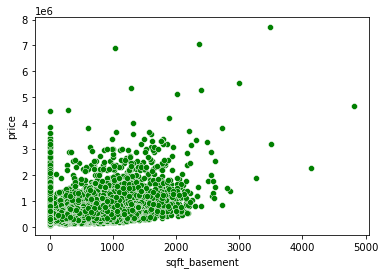

In [19]:
sns.scatterplot(x='sqft_basement',y='price',data=df,color='green');

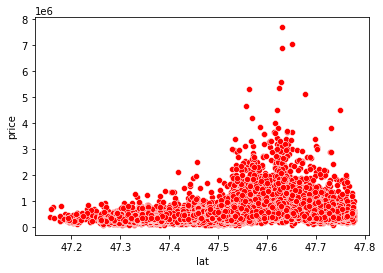

In [20]:
sns.scatterplot(x='lat',y='price',data=df,color='red');

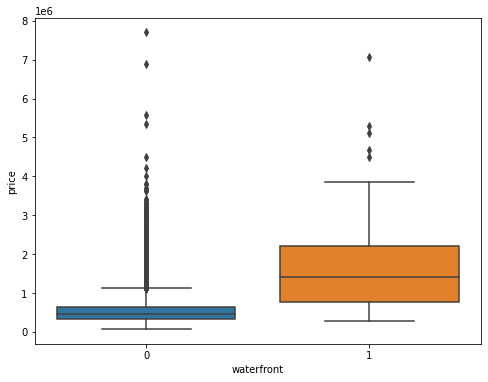

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront',y='price',data=df);

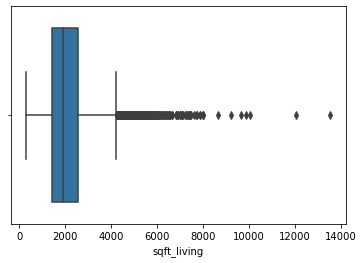

In [22]:
sns.boxplot(df['sqft_living']);

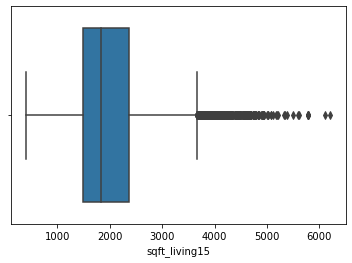

In [23]:
sns.boxplot(df['sqft_living15']);

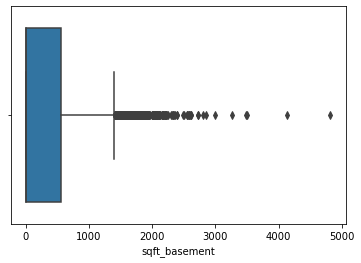

In [24]:
sns.boxplot(df['sqft_basement']);

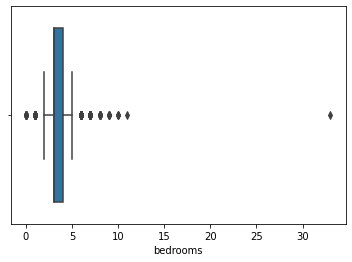

In [25]:
sns.boxplot(df['bedrooms']);

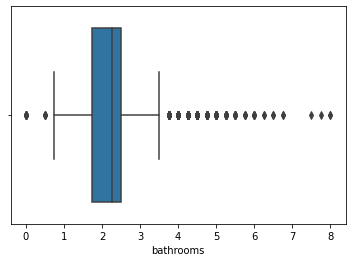

In [26]:
sns.boxplot(df['bathrooms']);

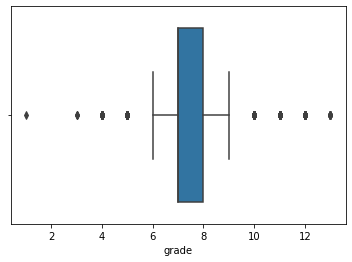

In [27]:
sns.boxplot(df['grade']);

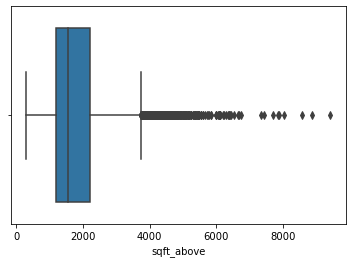

In [28]:
sns.boxplot(df['sqft_above']);

In [29]:
#sns.pairplot(data=df)

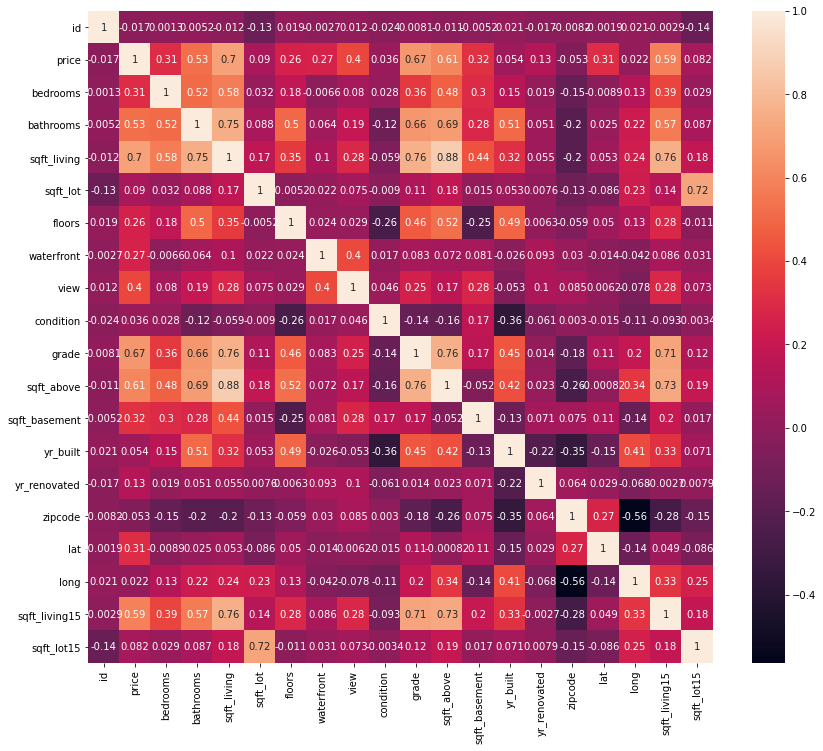

In [30]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(),annot=True);
#Thanks to heatmap, we can create a corr graph
#annot=True shows the numbers in the boxes
#we'll take the dark colors on the map

In [31]:
x=df[['bedrooms','bathrooms','sqft_living','floors','grade','waterfront','view','sqft_above','lat','sqft_living15','sqft_basement']]
# We take columns with a correlation between 20%-90% (dark color)

In [32]:
x.head()

,bedrooms,bathrooms,sqft_living,floors,grade,waterfront,view,sqft_above,lat,sqft_living15,sqft_basement
0,3,1.00,1180,1.0,7,0,0,1180,47.5112,1340,0
1,3,2.25,2570,2.0,7,0,0,2170,47.7210,1690,400
2,2,1.00,770,1.0,6,0,0,770,47.7379,2720,0
3,4,3.00,1960,1.0,7,0,0,1050,47.5208,1360,910
4,3,2.00,1680,1.0,8,0,0,1680,47.6168,1800,0


In [33]:
x.describe()

,bedrooms,bathrooms,sqft_living,floors,grade,waterfront,view,sqft_above,lat,sqft_living15,sqft_basement
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.494309,7.656873,0.007542,0.234303,1788.390691,47.560053,1986.552492,291.509045
std,0.930062,0.770163,918.440897,0.539989,1.175459,0.086517,0.766318,828.090978,0.138564,685.391304,442.575043
min,0.000000,0.000000,290.000000,1.000000,1.000000,0.000000,0.000000,290.000000,47.155900,399.000000,0.000000
25%,3.000000,1.750000,1427.000000,1.000000,7.000000,0.000000,0.000000,1190.000000,47.471000,1490.000000,0.000000
50%,3.000000,2.250000,1910.000000,1.500000,7.000000,0.000000,0.000000,1560.000000,47.571800,1840.000000,0.000000
75%,4.000000,2.500000,2550.000000,2.000000,8.000000,0.000000,0.000000,2210.000000,47.678000,2360.000000,560.000000
max,33.000000,8.000000,13540.000000,3.500000,13.000000,1.000000,4.000000,9410.000000,47.777600,6210.000000,4820.000000


In [34]:
#equate the column we are going to predict to y
y=df[['price']]

In [35]:
y.shape

(21613, 1)

In [36]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [37]:
df['zipcode']=df['zipcode'].astype('category')
x=pd.get_dummies(x,drop_first=True)

In [38]:
#df['date']=pd.to_datetime(df['date'])
#df['day']=(df['date']).dt.day
#df['month']=(df['date']).dt.month
#df['year']=(df['date']).dt.year

In [39]:
#df['month_name']=df['date'].dt.month_name()
#df['weekday']=df['date'].dt.day_name()

In [40]:
#sns.pairplot(df)
#Creates graphs showing the connection of all columns by all columns

In [41]:
#sk stands for science kit
#science kit learn or es.key learn
# We import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# I'm splitting the data with train_test_split to see the success rate

In [42]:
# I set random 13 numbers with seed (13), but I always use these random numbers
# they usually give 42 instead of 13
# When you put 13, it will select the same 20% each time and assign it to the test.
# randomly select 20% of the data and test it
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)
# train_test_split assigns 20% of all data to test(x,y test) and the rest to train(x,y train)
# y test the data we set aside
# As the random_state i is written high, the margin of error decreases, they usually make 42

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape
#trains 80% of data to train

((17290, 11), (4323, 11), (17290, 1), (4323, 1))

In [44]:
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train)
# learning from data with fit
# Model learns by looking at x_train data versus y_train data
# He says this is the price for x and y trains, he learns

In [45]:
y_pretest=regmodel.predict(x_test)
y_pretest
# We make predictions with  predict
# predicts the prices of the data we reserved for testing with the model it learned

array([[366154.8823015 ],
       [128184.77772707],
       [158877.70167321],
       ...,
       [388884.4986553 ],
       [481012.99663816],
       [239265.128612  ]])

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
# If r2 is 80% and above, our model is successful

In [47]:
(mean_squared_error(y_test,y_pretest))**0.5
# we need to reduce our error rate too much

205773.56045861213

In [48]:
r2_score(y_test,y_pretest)
# we need to increase the success rate above 80%

0.6724038833660984

In [49]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
# we write double [] so that the result is dataframe
df= df[df["bedrooms"] < 10]
df= df[df["bathrooms"] < 10]
df= df[df['sqft_living']<4000]
df= df[df['sqft_living15']<3500]
df= df[df['sqft_above']<4000]

df= df[df['view'] ==0]
df= df[df['waterfront'] ==0]


In [51]:
df['bedrooms']=df['bedrooms']**2
df['bathrooms']=df['bathrooms']**2
df['grade']=df['grade']/2

df['age']=2021-df['yr_built']
df['sqft']=df['sqft_living']+df['sqft_living15']+df['sqft_basement']+df['sqft_above']
df['sqft']=df['sqft']**2

In [52]:
# model failed we will redo
x,y=df[['bedrooms','bathrooms','sqft','floors','grade','waterfront','view','lat','zipcode','age']],df[['price']]
# we will convert the make and model into numbers with dummie and include them in the data

In [53]:
# We make text fields numerical with dummie
x=pd.get_dummies(x,drop_first=True)
# was deleting a row with drop_first
x.head()

,bedrooms,bathrooms,sqft,floors,grade,waterfront,view,lat,age,zipcode_98002,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,13690000,1.0,3.5,0,0,47.5112,66,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,46648900,2.0,3.5,0,0,47.7210,70,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,18147600,1.0,3.0,0,0,47.7379,88,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,27878400,1.0,3.5,0,0,47.5208,56,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,26625600,1.0,4.0,0,0,47.6168,34,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train)
y_pretest=regmodel.predict(x_test)
y_pretest

array([[289214.14047545],
       [189267.79881723],
       [983998.93884582],
       ...,
       [579481.79716018],
       [453075.0431341 ],
       [462999.37274212]])

In [55]:
(mean_squared_error(y_test,y_pretest))**0.5
# Compared y_test with y_pretest and gave the error rate

99755.13357246648

In [56]:
r2_score(y_test,y_pretest)
# our success rate has increased to 97%
# looks at data and estimates prices correctly when plus new data
# you can also predict election results this way
# we try to reach where we can accept success by using the least number of columns
# the fewer columns you use, the better
# try to get the margin of error with as few columns as the boss can accept
# we can't rely on just one model, we need to test it with other models
# for example, when writing news, you cannot trust the data you wrote from 1 source, you should look at other sources

0.812119289727927

In [57]:
# Ridge Lasso
# Ridge tries to reduce errors by squaring lasso absolute value
# 2 different models
from sklearn.linear_model import Ridge, Lasso

In [58]:
R=Ridge()
R.fit(x_train,y_train)
y_pred_ridge=R.predict(x_test)

In [59]:
y_pred_ridge

array([[290843.20013185],
       [194343.14458744],
       [990456.51045663],
       ...,
       [590540.79081009],
       [448420.13826013],
       [458451.8598922 ]])

In [60]:
(mean_squared_error(y_test,y_pred_ridge))**0.5

99952.20959254062

In [61]:
r2_score(y_test,y_pred_ridge)

0.8113762030051387

In [62]:
L=Lasso()
L.fit(x_train,y_train)
y_pred_lasso=L.predict(x_test)

In [63]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

99770.95886774365

In [64]:
r2_score(y_test,y_pred_lasso)

0.8120596736770602

In [65]:
#ElasticNet
from sklearn.linear_model import ElasticNet
E=ElasticNet(l1_ratio= .8)
E.fit(x_train,y_train)
y_pred_elastic=E.predict(x_test)

In [66]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

99770.95886774365

In [67]:
r2_score(y_test,y_pred_lasso)

0.8120596736770602

In [68]:
df.T
# rows become columns, columns become rows

,0,1,2,3,4,6,7,8,9,10,...,21603,21604,21605,21606,21607,21608,21609,21610,21611,21612
id,7129300520,6414100192,5631500400,2487200875,1954400510,1321400060,2008000270,2414600126,3793500160,1736800520,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,20150403T000000,...,20140825T000000,20150126T000000,20141014T000000,20150326T000000,20150219T000000,20140521T000000,20150223T000000,20140623T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,257500,291850,229500,323000,662500,...,507250,429000,610685,1.0075e+06,475000,360000,400000,402101,400000,325000
bedrooms,9,9,4,16,9,9,9,9,9,9,...,9,9,16,16,9,9,16,4,9,4
bathrooms,1,5.0625,1,9,4,5.0625,2.25,1,6.25,6.25,...,6.25,4,6.25,12.25,6.25,6.25,6.25,0.5625,6.25,0.5625
sqft_living,1180,2570,770,1960,1680,1715,1060,1780,1890,3560,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,6819,9711,7470,6560,9796,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1,2,1,1,1,2,1,1,2,1,...,2,3,2,2,2,3,2,2,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
